<a href="https://colab.research.google.com/github/saitehith28/Deep-Learning/blob/main/Deep_Learning_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

17464789/17464789 [==============================] - 1s 0us/step
Epoch 1/5
157/157 [==============================] - 106s 667ms/step - loss: 0.6653 - accuracy: 0.5752 - val_loss: 0.7267 - val_accuracy: 0.5634
Epoch 2/5
157/157 [==============================] - 107s 683ms/step - loss: 0.4673 - accuracy: 0.7770 - val_loss: 0.5836 - val_accuracy: 0.6802
Epoch 3/5
157/157 [==============================] - 113s 720ms/step - loss: 0.4794 - accuracy: 0.7728 - val_loss: 0.5431 - val_accuracy: 0.7288
Epoch 4/5
157/157 [==============================] - 109s 690ms/step - loss: 0.4773 - accuracy: 0.7934 - val_loss: 0.5965 - val_accuracy: 0.6964
Epoch 5/5
196/196 [==============================] - 35s 178ms/step - loss: 0.4596 - accuracy: 0.7993
Epoch 1/5
157/157 [==============================] - 232s 1s/step - loss: 0.5434 - accuracy: 0.6963 - val_loss: 0.3827 - val_accuracy: 0.8314
Epoch 2/5
157/157 [==============================] - 232s 1s/step - loss: 0.3241 - accuracy: 0.8635 - val_loss:

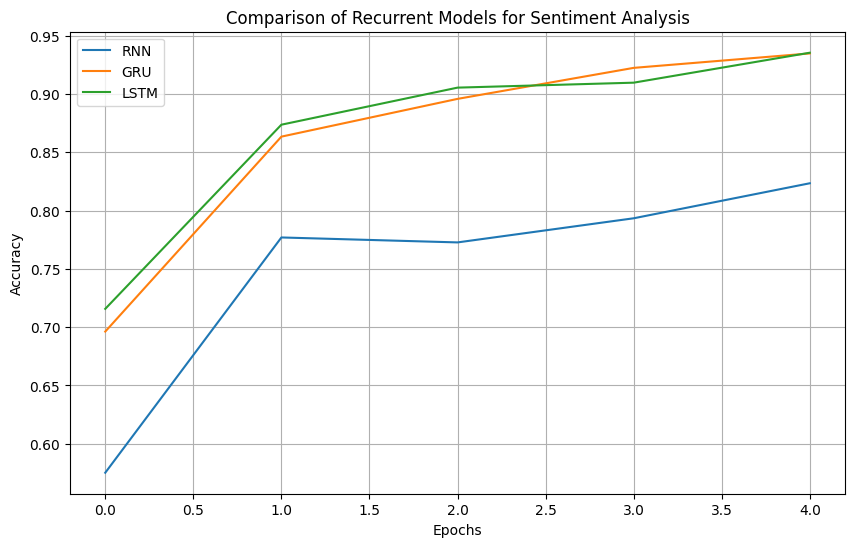

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, GRU, LSTM, Dense
from tensorflow.keras.preprocessing import sequence

# Set the maximum number of words to consider in the reviews
max_words = 5000

# Load the IMDB dataset
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_words)

# Pad the sequences to have the same length
max_length = 500
x_train = sequence.pad_sequences(x_train, maxlen=max_length)
x_test = sequence.pad_sequences(x_test, maxlen=max_length)

# Lists to store accuracy for each model
accuracies = []

# Models to compare
model_names = ["RNN", "GRU", "LSTM"]

models = [
    Sequential([
        Embedding(max_words, 100, input_length=max_length),
        SimpleRNN(128),
        Dense(1, activation='sigmoid')
    ]),
    Sequential([
        Embedding(max_words, 100, input_length=max_length),
        GRU(128),
        Dense(1, activation='sigmoid')
    ]),
    Sequential([
        Embedding(max_words, 100, input_length=max_length),
        LSTM(128),
        Dense(1, activation='sigmoid')
    ])
]

# Compile and train models
batch_size = 128
epochs = 5

# Lists to store history for each model
histories = []

for model in models:
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)
    histories.append(history)
    _, accuracy = model.evaluate(x_test, y_test, batch_size=batch_size)
    accuracies.append(accuracy)

# Create a line plot for accuracy over epochs
plt.figure(figsize=(10, 6))
for i, history in enumerate(histories):
    plt.plot(history.history['accuracy'], label=model_names[i])

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Comparison of Recurrent Models for Sentiment Analysis')
plt.legend()
plt.grid(True)
plt.show()